### Topic Modelling for Rick and Morty Transcript

### Install Packages

In [1]:
!pip install top2vec
!pip install scikit-learn
!pip install pandas
!pip install torch
!pip install tensorflow
!pip install bertopic
!pip install sentence-transformers
!pip install spacy
!pip install gensim
!pip install pyldavis
!pip install tf-keras

### Import Modules

In [2]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy

### Load Pandas Dataframe

In [3]:
PATH_TO_RAW_DATA = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/rick_and_morty_master.csv"
PATH_TO_CLEAN_DATA = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/rick_and_morty_master_clean.csv"

df = pd.read_csv( PATH_TO_CLEAN_DATA , index_col = "Unnamed: 0")
print(df)


      episode no.             speaker  \
0               1                Rick   
1               1               Morty   
2               1                Rick   
3               1               Morty   
4               1                Rick   
...           ...                 ...   
9613           51  Mr. Poopybutthole:   
9614           51  Mr. Poopybutthole:   
9615           51  Mr. Poopybutthole:   
9616           51  Mr. Poopybutthole:   
9617           51  Mr. Poopybutthole:   

                                               dialouge  
0     stumbl drunkenli turn light morty got tocom ju...  
1                                       rub eye rick go  
2                                     got surpris morty  
3                                      middl night talk  
4     spill alcohol morty ’s bed come got surpris dr...  
...                                                 ...  
9613                   cuz want love thought felt becom  
9614    ever think horrifi peopl love would

### Delete Main Characters names as they are not relevant for topics

In [4]:
df["dialouge"] = df["dialouge"].apply(lambda x: str(x).replace("rick" , "").replace("morty", "").replace("summer","").replace("jerry" ,"").replace("beth",""))
df

episode no.             speaker  \
0               1                Rick   
1               1               Morty   
2               1                Rick   
3               1               Morty   
4               1                Rick   
...           ...                 ...   
9613           51  Mr. Poopybutthole:   
9614           51  Mr. Poopybutthole:   
9615           51  Mr. Poopybutthole:   
9616           51  Mr. Poopybutthole:   
9617           51  Mr. Poopybutthole:   

                                               dialouge  
0     stumbl drunkenli turn light  got tocom jus ’ g...  
1                                           rub eye  go  
2                                          got surpris   
3                                      middl night talk  
4     spill alcohol  ’s bed come got surpris dragsmo...  
...                                                 ...  
9613                   cuz want love thought felt becom  
9614    ever think horrifi peopl love would found tr...  
9615                                               wish  
9616          wish brave enough love back know mayb tri  
9617                            much time think ooo eee  

[9618 rows x 3 columns]

### Define Function to Tokenize Strings

In [5]:
def tokenize(docs):
  '''
  Performs tokenization of input documents.
  Args:
    - docs: list of strings with input documents
  Output:
    - list of strings with tokenized input
  '''
  tokenized_docs = []
  for doc in docs:
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    tokenized_docs.append(tokens)
  return (tokenized_docs)

### Split Dataframe into seasons

In [6]:
seasons_splitter = [(1,11) , (12,21) , (22,31) , (32,41) , (42,51) , (521, -1)]
seasons_dfs = []

for splitter in seasons_splitter:
    seasons_dfs.append(df[(df["episode no."] >= splitter[0]) &  (df["episode no."] <= splitter[1])])


### Create a new transcript Column

In [7]:
df["transcript"] = df["speaker"] + "  : " + df["dialouge"]
df = df.dropna()
df

episode no.             speaker  \
0               1                Rick   
1               1               Morty   
2               1                Rick   
3               1               Morty   
4               1                Rick   
...           ...                 ...   
9613           51  Mr. Poopybutthole:   
9614           51  Mr. Poopybutthole:   
9615           51  Mr. Poopybutthole:   
9616           51  Mr. Poopybutthole:   
9617           51  Mr. Poopybutthole:   

                                               dialouge  \
0     stumbl drunkenli turn light  got tocom jus ’ g...   
1                                           rub eye  go   
2                                          got surpris    
3                                      middl night talk   
4     spill alcohol  ’s bed come got surpris dragsmo...   
...                                                 ...   
9613                   cuz want love thought felt becom   
9614    ever think horrifi peopl love would found tr...   
9615                                               wish   
9616          wish brave enough love back know mayb tri   
9617                            much time think ooo eee   

                                             transcript  
0     Rick  : stumbl drunkenli turn light  got tocom...  
1                                  Morty  : rub eye  go  
2                                Rick  :   got surpris   
3                           Morty  :   middl night talk  
4     Rick  : spill alcohol  ’s bed come got surpris...  
...                                                 ...  
9613  Mr. Poopybutthole:  :   cuz want love thought ...  
9614  Mr. Poopybutthole:  :   ever think horrifi peo...  
9615                       Mr. Poopybutthole:  :   wish  
9616  Mr. Poopybutthole:  :   wish brave enough love...  
9617    Mr. Poopybutthole:  :   much time think ooo eee  

[9615 rows x 4 columns]

### Create list of Strings

In [8]:
docs = [ str(x) for x in df["dialouge"] ] 
id2word = corpora.Dictionary(tokenize(docs))

# Modeling

## Libraries

In [9]:
import pyLDAvis
import pyLDAvis.gensim_models

## Top2Vec Modelling

In [ ]:
'''
Topic Modeling with Top2Vec: Minimum Viable Example
References:
[1] https://github.com/ddangelov/Top2Vec
[2] https://top2vec.readthedocs.io/_/downloads/en/stable/pdf/
'''
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups

top2vec_topic_model = Top2Vec(
  docs, 
  embedding_model = 'doc2vec',
  min_count = 3,              
  umap_args = None,           
  hdbscan_args = None      
  )

## Nearest Words for Word "planet"

In [ ]:
# Search the closest 5 topics to the input query "planet"
topic_words, word_scores, topic_scores, topic_nums = top2vec_topic_model.search_topics(
    keywords = ["planet"], 
    num_topics = 2)

# Plot the resulting topics as wordclouds
for topic in topic_nums:
    top2vec_topic_model.generate_topic_wordcloud(topic)

In [ ]:
##

In [ ]:
# corpus = []
# for doc in tokenized_docs:
#     corpus.append(id2word.doc2bow(doc))

### Print All Top2Vec Topic

In [ ]:
print(top2vec_topic_model.get_topics())

## Topic Modeling with BERT

###  Import Modules

In [10]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

2025-01-30 11:21:13.575342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738232473.589510   78165 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738232473.593669   78165 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 11:21:13.607461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Train BERT Topic Model

In [14]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


cluster_model = HDBSCAN(min_cluster_size = 50, 
                        metric = 'euclidean', 
                        cluster_selection_method = 'eom', 
                        prediction_data = True)


topic_model = BERTopic(embedding_model = embedding_model,
                       hdbscan_model = cluster_model)

topics, probs = topic_model.fit_transform(docs)

# Save topics dendrogram as HTML file


### Visualize TOPICS from BERTTopic

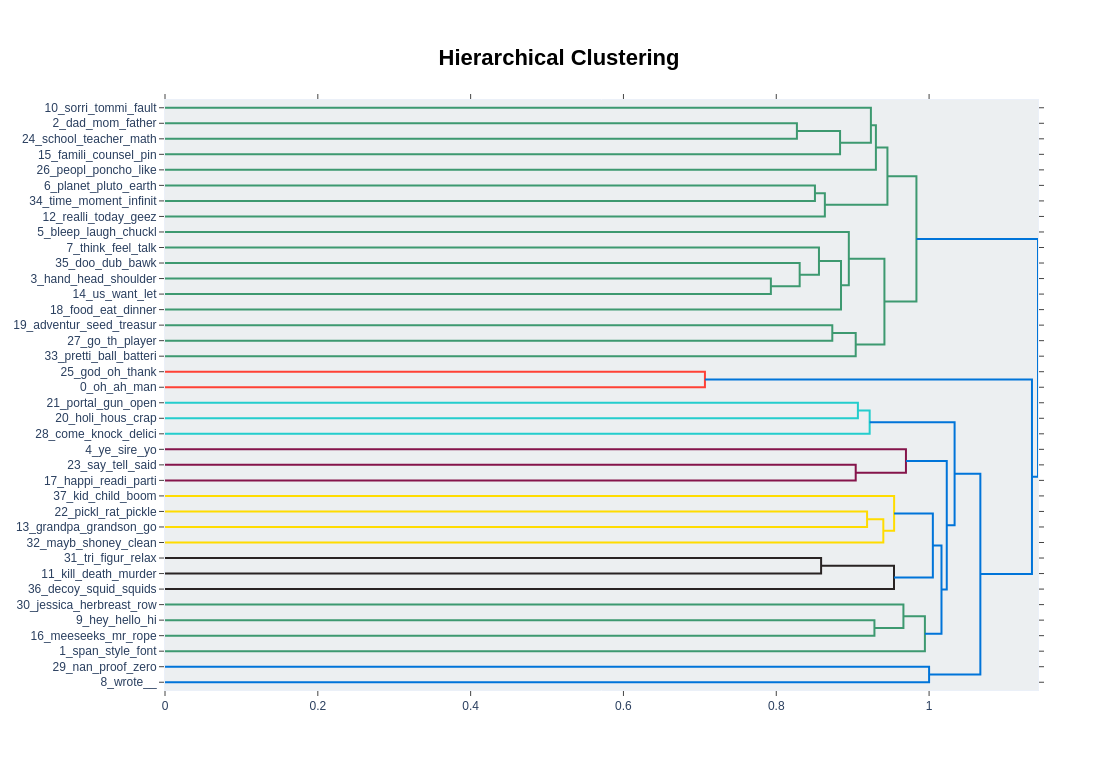

In [15]:
topic_model.visualize_hierarchy()

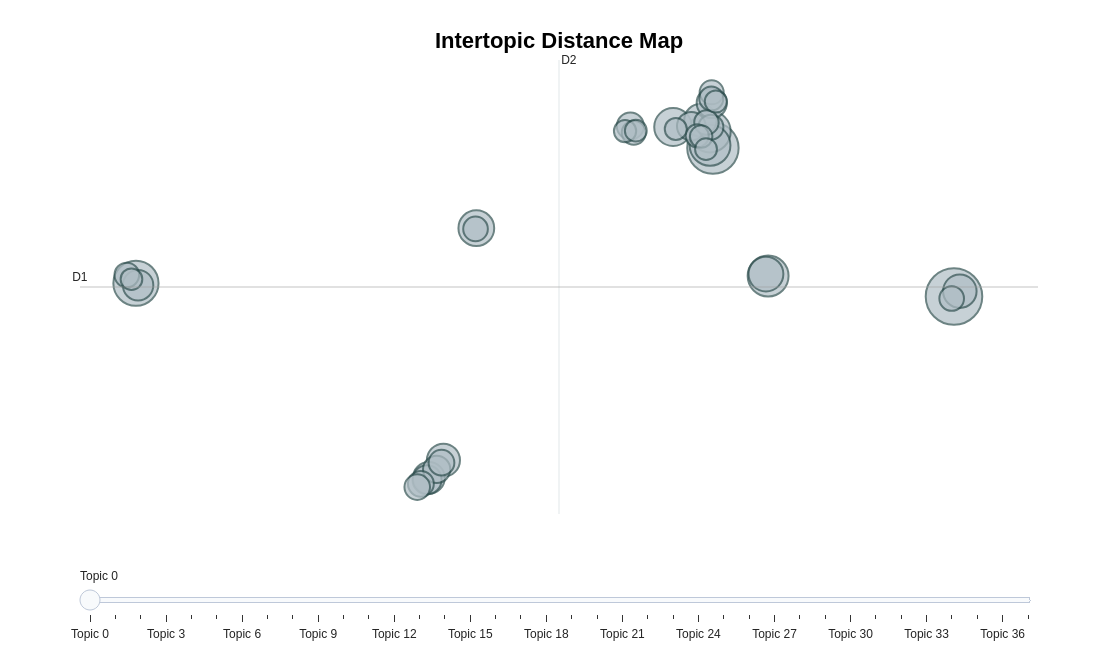

In [16]:
topic_model.visualize_topics()

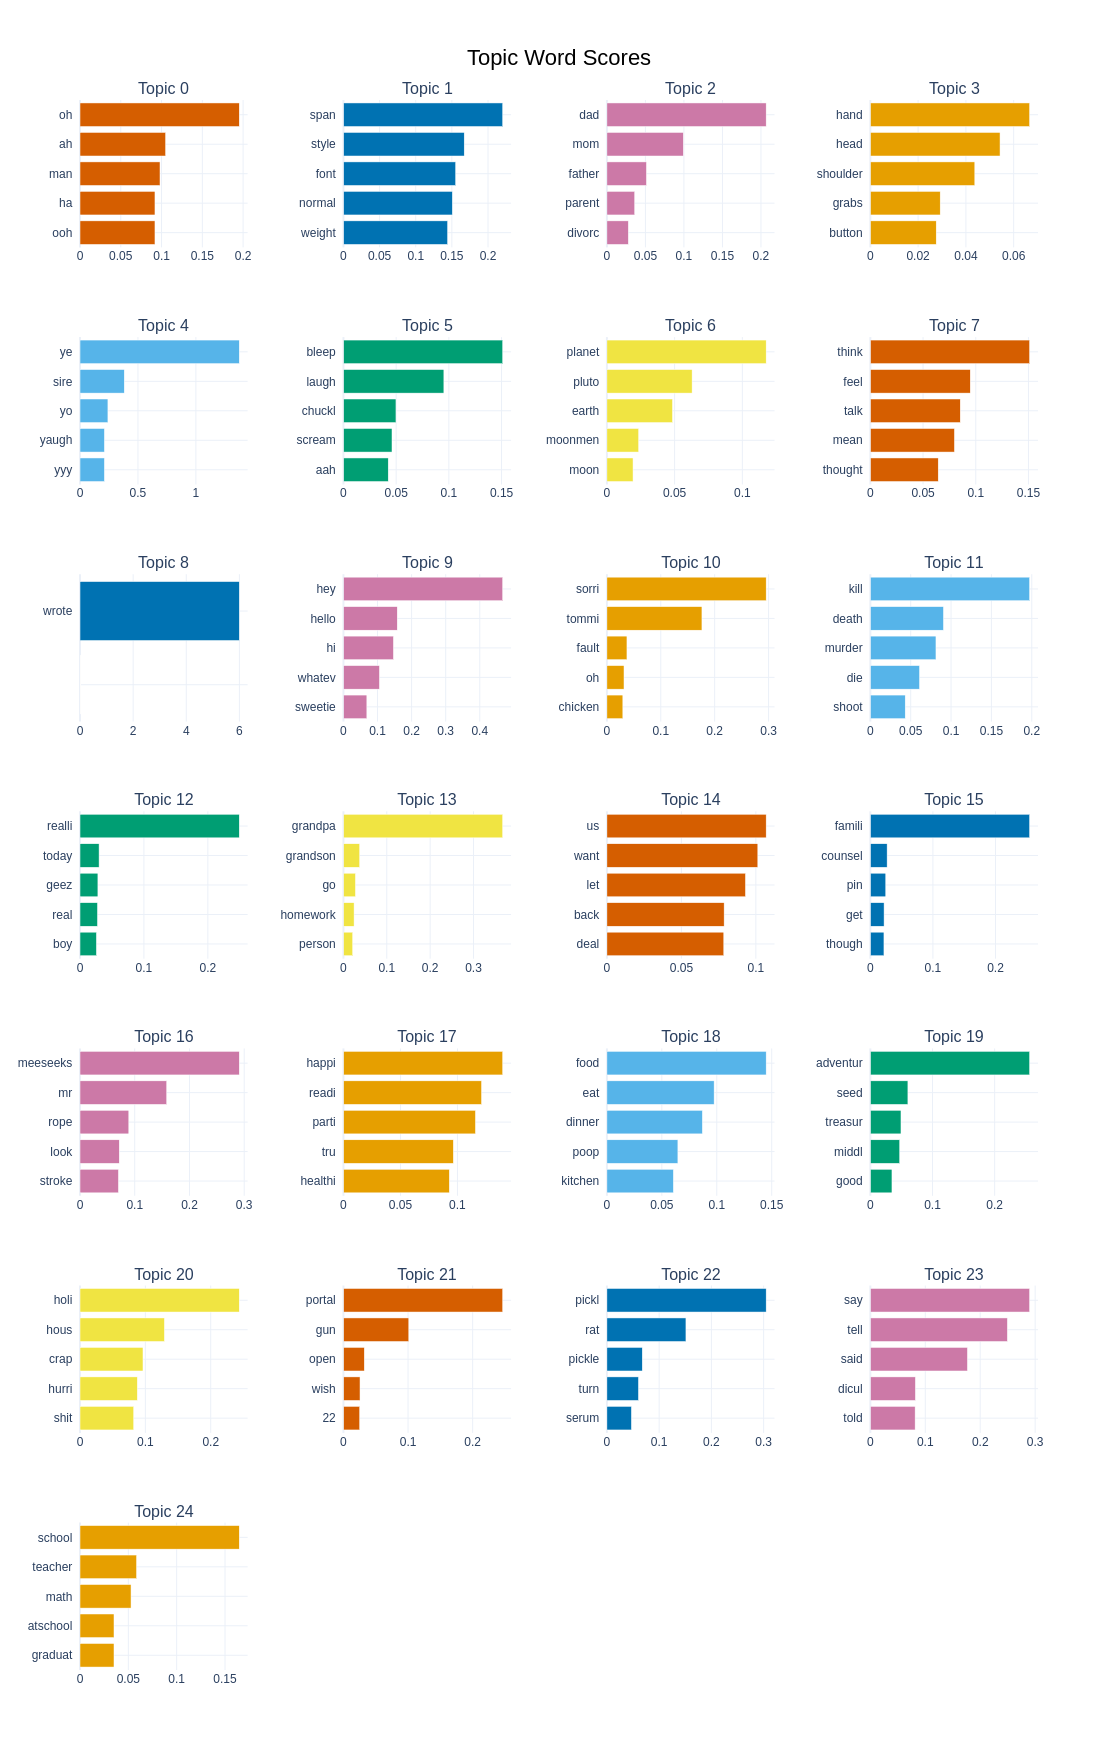

In [17]:
topic_model.visualize_barchart(top_n_topics = 25)

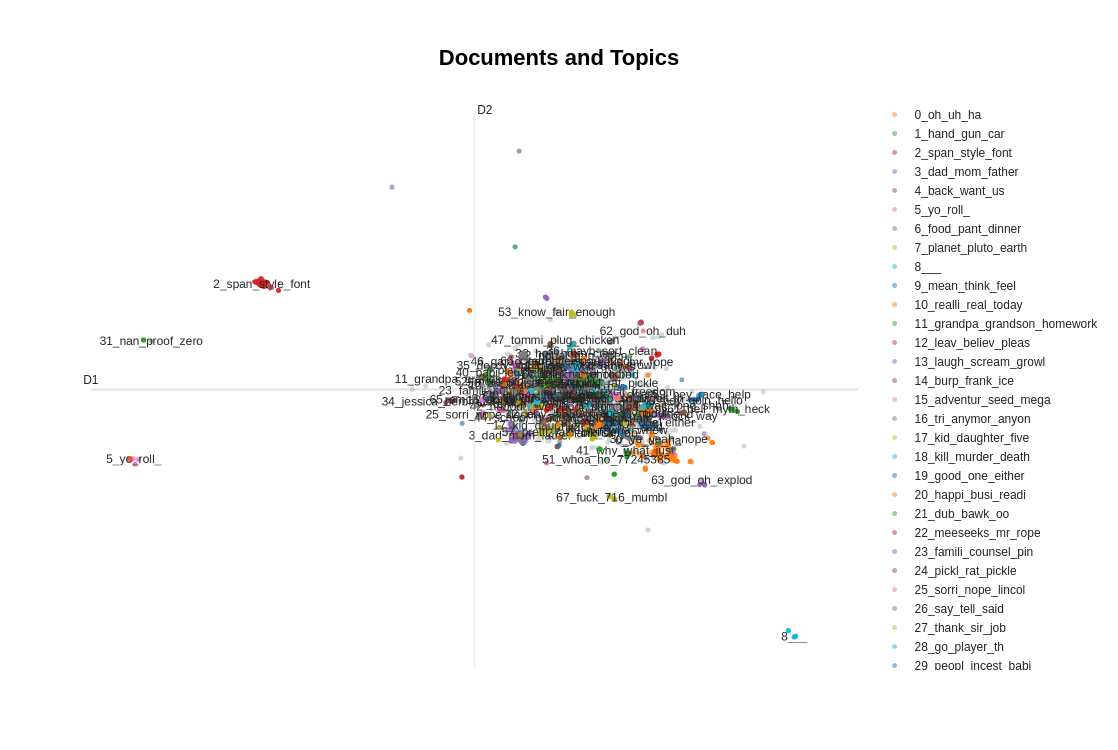

In [16]:
topic_model.visualize_documents(docs)

# Topic per Season

## Top2vec

In [12]:
from top2vec import Top2Vec
topic_models_season = []

for season_df in seasons_dfs:

    docs =  [ str(x) for x in season_df["dialouge"] ] 
    
    season_topic_model = Top2Vec(
      docs, 
      embedding_model = 'doc2vec', # Embedding model: See [1,2] for supported models
      min_count = 3,              # Ignore words less frequent than this value
      umap_args = None,            # Dict of custom args for UMAP
      hdbscan_args = None          # Dict of custom argd for HDBSCAN
      )
    topic_models_season.append(season_topic_model)
    

2025-01-26 16:47:43.627805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737906463.682392   19441 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737906463.708769   19441 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 16:47:43.863458: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-26 16:47:48,645 - top2vec - INFO - Pre-processing documents for training
2025-01-26 16:47:48,691 - top2vec - INFO - C

ValueError: need at least one array to concatenate

In [16]:
print(topic_models_season[2].get_topics())

(array([['teach', 'send', 'better', 'smartest', 'pussi', 'booger',
        'spent', 'frozen', 'ugli', 'normal', 'quit', 'pretend', 'ooh',
        'pistol', 'speak', 'mode', 'necessari', 'mess', 'princess', 'so',
        'absolut', 'fella', 'clear', 'rob', 'marri', 'option', 'arrest',
        'earth', 'stare', 'equival', 'shot', 'easi', 'peed', 'beep',
        'student', 'end', 'plan', 'seriou', 'bond', 'bring', 'sanchez',
        'forgiv', 'round', 'graze', 'll', 'hate', 'commiss', 'great',
        'agre', 'revers'],
       ['babi', 'froopi', 'galact', 'escap', 'surviv', 'father',
        'tomorrow', 'pretti', 'tommi', 'third', 'flip', 'told', 'like',
        'number', 'parent', 'froopyland', 'code', 'morty', 'talk', 'pee',
        'valu', 'reward', 'helicopt', 'coffe', 'human', 'pant', 'time',
        'place', 'sex', 'includ', 'think', 'guy', 'hot', 'bang', 'stuff',
        'eli', 'knob', 'suppos', 'experi', 'endless', 'fix', 'sorri',
        'specif', 'intellig', 'deserv', 'floor', '

## BERT

In [19]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
topic_models_season_BERT = []

for season_df in seasons_dfs:

    docs =  [ str(x) for x in season_df["dialouge"] ] 
    
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
    
    # Clustering model: See [2] for more details
    cluster_model = HDBSCAN(min_cluster_size = 15, 
                            metric = 'euclidean', 
                            cluster_selection_method = 'eom', 
                            prediction_data = True)
    
    # BERTopic model
    season_topic_model = BERTopic(embedding_model = embedding_model,
                           hdbscan_model = cluster_model)
    
    # Fit the model on a corpus
    topics, probs = season_topic_model.fit_transform(docs)
    topic_models_season_BERT.append(season_topic_model)

TypeError: Make sure that the iterable only contains strings.

5


In [24]:
for topic_model in topic_models_season_BERT:
    topic_model.visualize_topics()

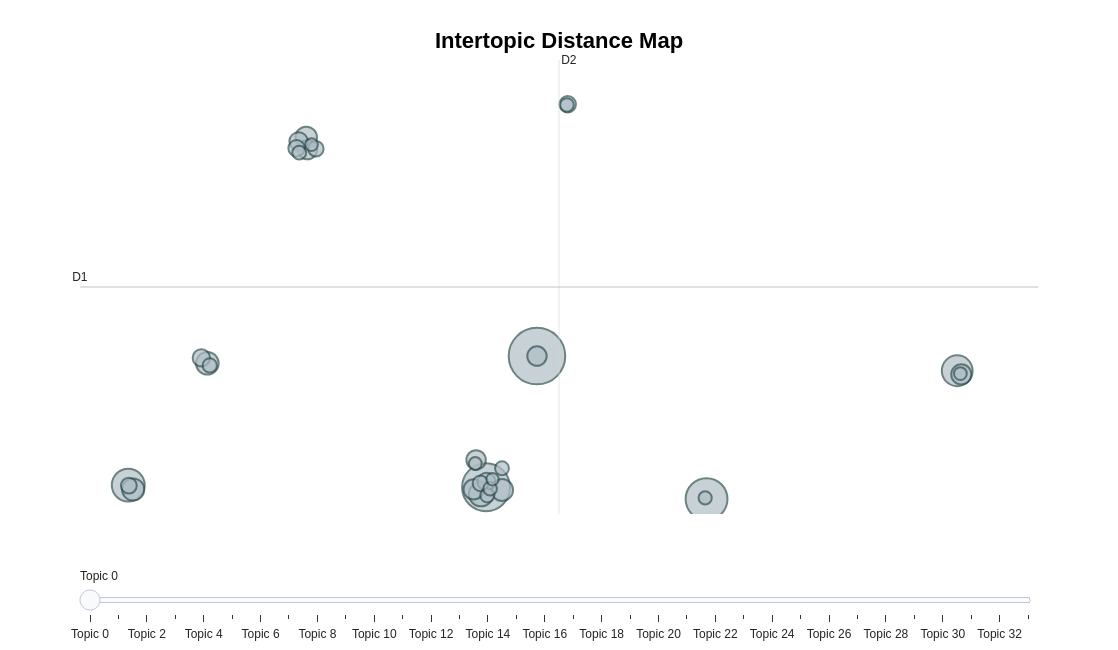

In [26]:
topic_models_season_BERT[0].visualize_topics()

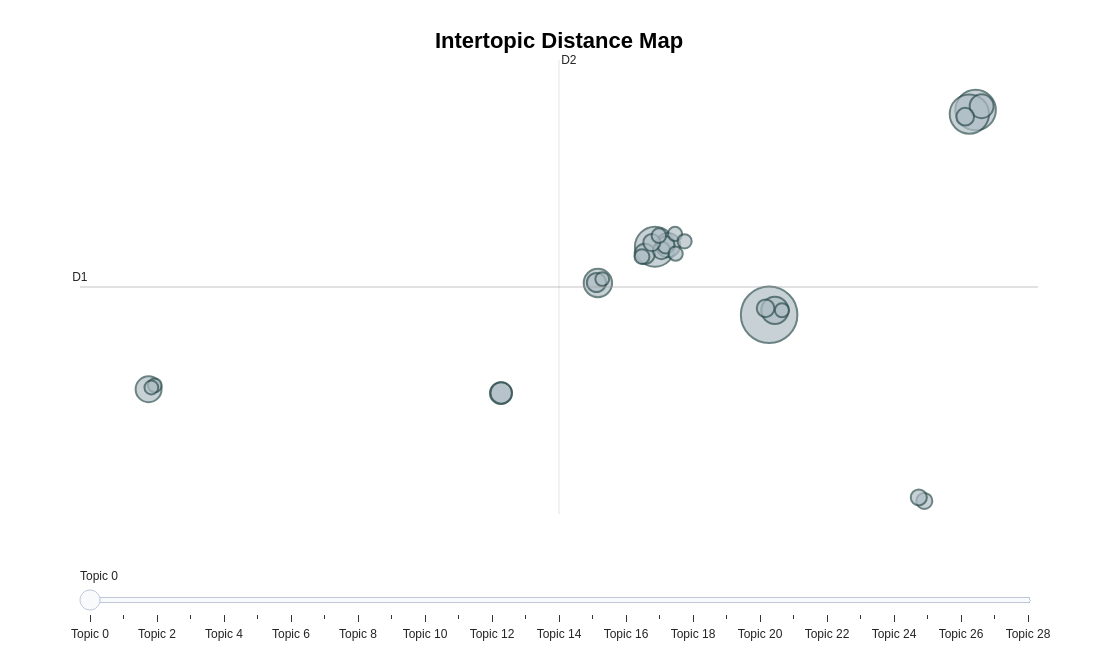

In [27]:
topic_models_season_BERT[1].visualize_topics()

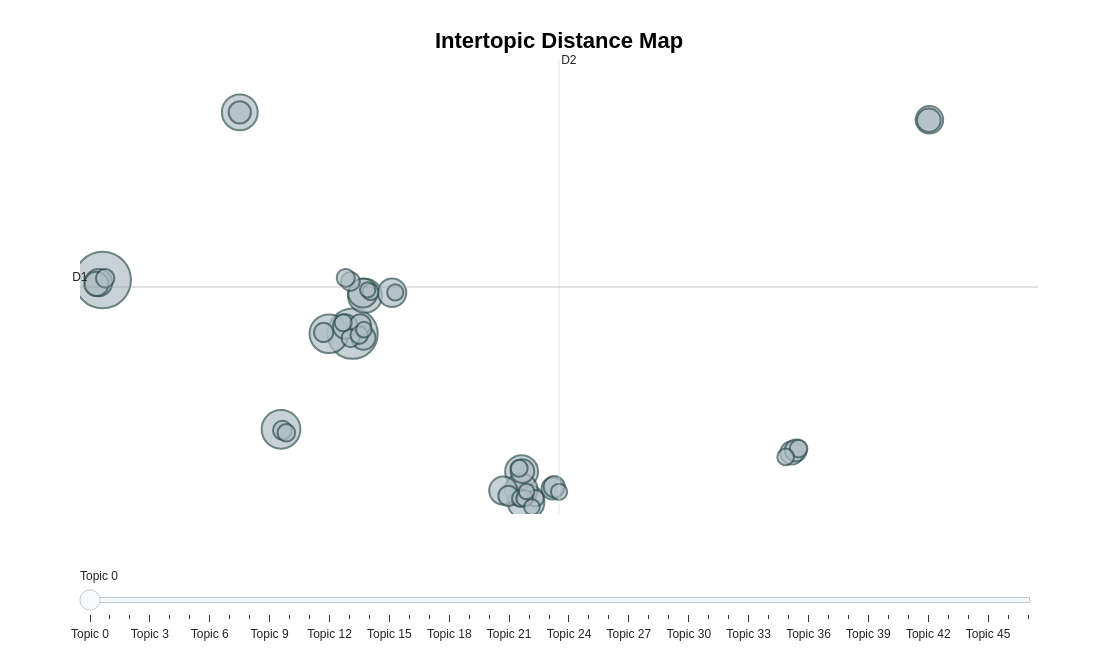

In [28]:
topic_models_season_BERT[2].visualize_topics()

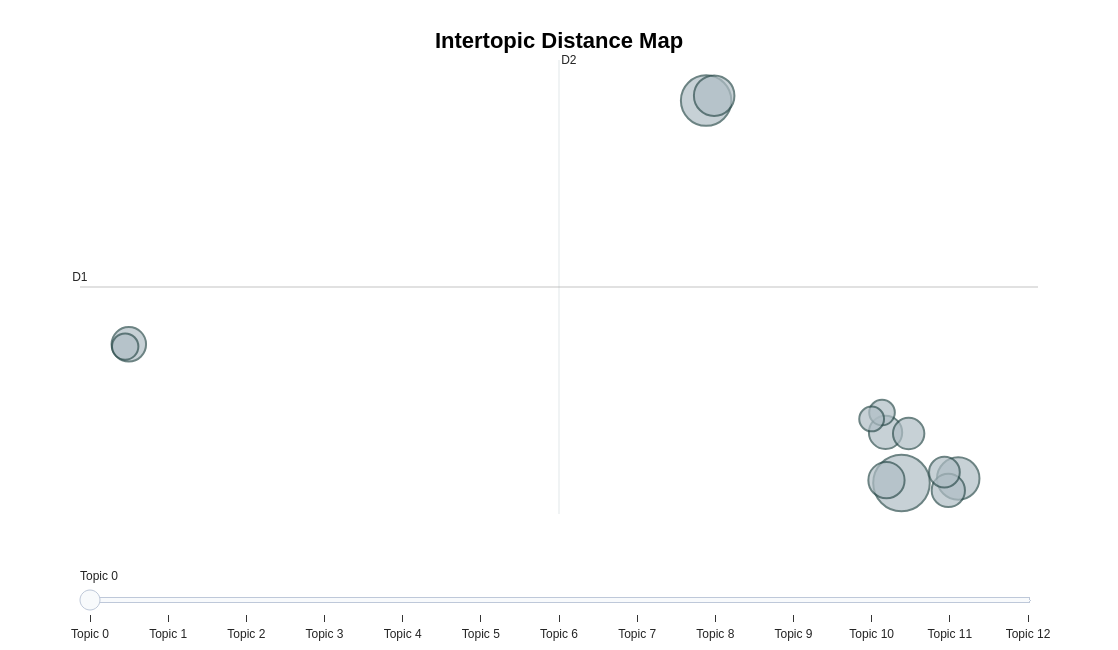

In [30]:
topic_models_season_BERT[4].visualize_topics()